# Датасет №2 "Glass Classification"

### Описание датасета

Информация об атрибутах:

- Id номер: от 1 до 214
- RI: Коэффициент преломления
- Na: Натрий (единица измерения: весовой процент в соответствующем оксиде, как и атрибуты 4-10)
- Mg: Магний
- Al: Алюминий
- Si: Кремний
- K: Калий
- Ca: Кальций
- Ba: Барий
- Fe: Железо
- Тип стекла: (атрибут класса)
  1.  building_windows_float_processed (строительные_окна_плоские_обработанные)
  2.  building_windows_non_float_processed (строительные_окна_не_плоские_обработанные)
  3.  vehicle_windows_float_processed (автомобильные_окна_плоские_обработанные)
  4.  vehicle_windows_non_float_processed (автомобильные_окна_не_плоские_обработанные (нет в этой базе данных))
  5.  containers (контейнеры)
  6.  tableware (посуда) 
  7.  headlamps (фары)

### Импорт модулей

In [314]:
# импорт стандартных модулей 

import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

from collections import Counter

In [315]:
# иморт модулей sklearn'а

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Загрузка датасета и подготовка данных

Файл я брала с выгруженного на свой гитхаб репозитория

In [316]:
df = pd.read_csv('https://raw.githubusercontent.com/almondloverr/ml_exam/main/datasets/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [317]:
print("В датасете", df.shape[0], "точек данных и", df.shape[1], "параметров")

В датасете 214 точек данных и 10 параметров


In [318]:
df.info() # все параметры датасета — числовые, дополнительных манипуляций с данными проводить не нужно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [319]:
df.columns # Type — наша целевая переменная

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [320]:
df['Type'].unique() 

array([1, 2, 3, 5, 6, 7])

In [321]:
df.isnull().sum() # смотрим количество пустых значений в датасете (отустутстуют)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [322]:
df.describe().T # описательная статистика по всем параметрам

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


### Визуализация данных

#### Построим гистограммы, чтобы проанализировать распределение каждого из признаков

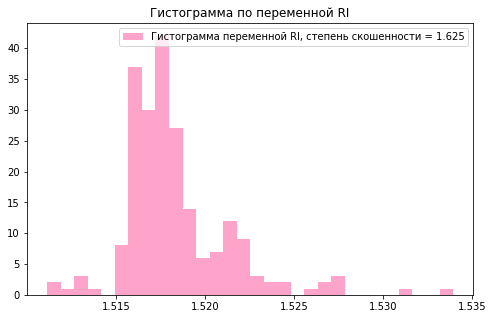

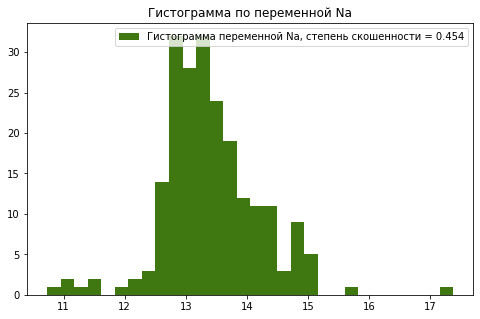

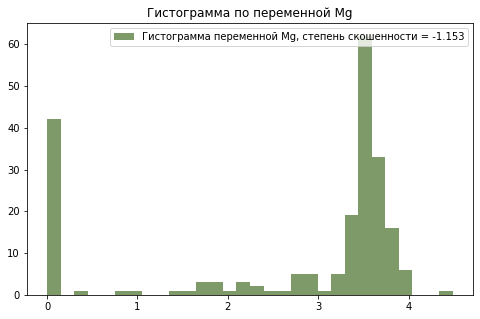

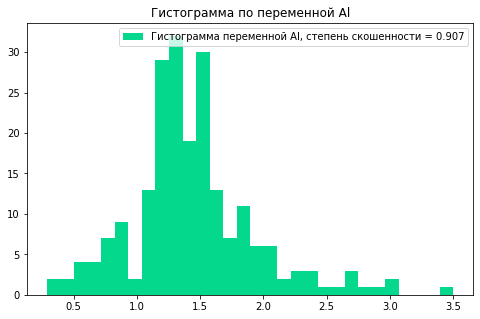

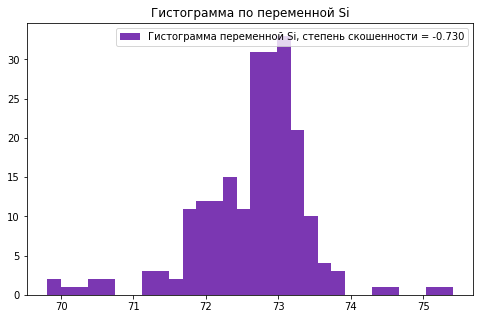

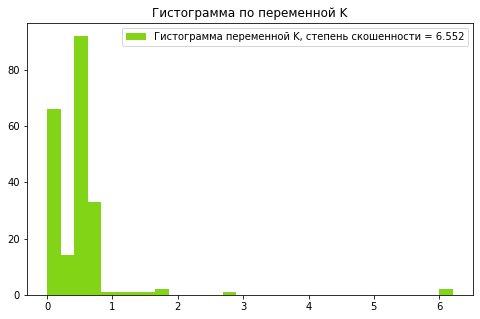

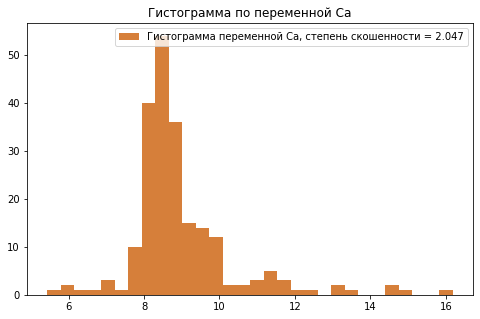

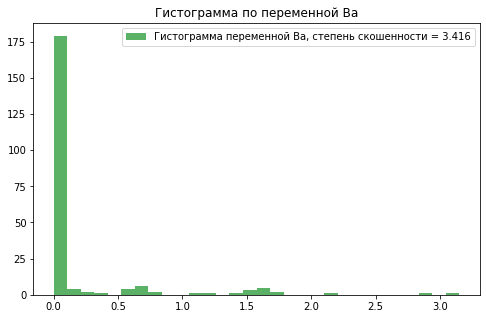

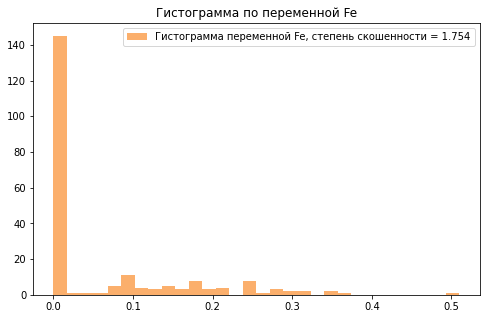

In [323]:
for feat in df.columns[:-1].tolist():
    plt.figure(figsize=(8, 5)) 
    plt.hist(df[feat], color=np.random.rand(3,), label=f'Гистограмма переменной {feat}, степень скошенности = %.3f'%(df[feat].skew()), bins=30) 
    plt.title(f'Гистограмма по переменной {feat}')
    plt.legend(loc='best')
    plt.show()

Ни одна из характеристик не имеет нормального распределения. Характеристики Fe, Ba, Ca и K имеют самые высокие коэффициенты перекоса. Более того, распределение калия (K) и бария (Ba), похоже, содержит много выбросов.

#### Построим ящики с усами, чтобы проанализировать датасет на наличие выбросов

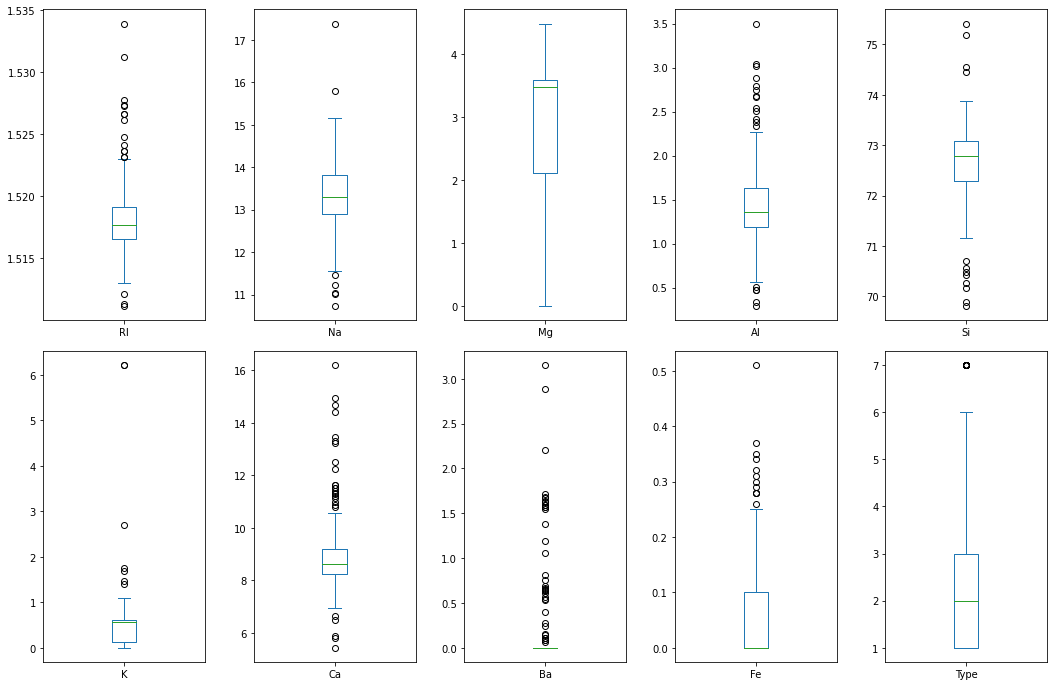

In [324]:
fig, ax = plt.subplots(2, df.shape[1]//2, figsize=(18,12))
df.plot(kind='box', subplots=True, ax=ax)
fig.subplots_adjust(wspace=0.3, hspace=0.1)

#### Посмотрим, как признаки коррелируют между собой 

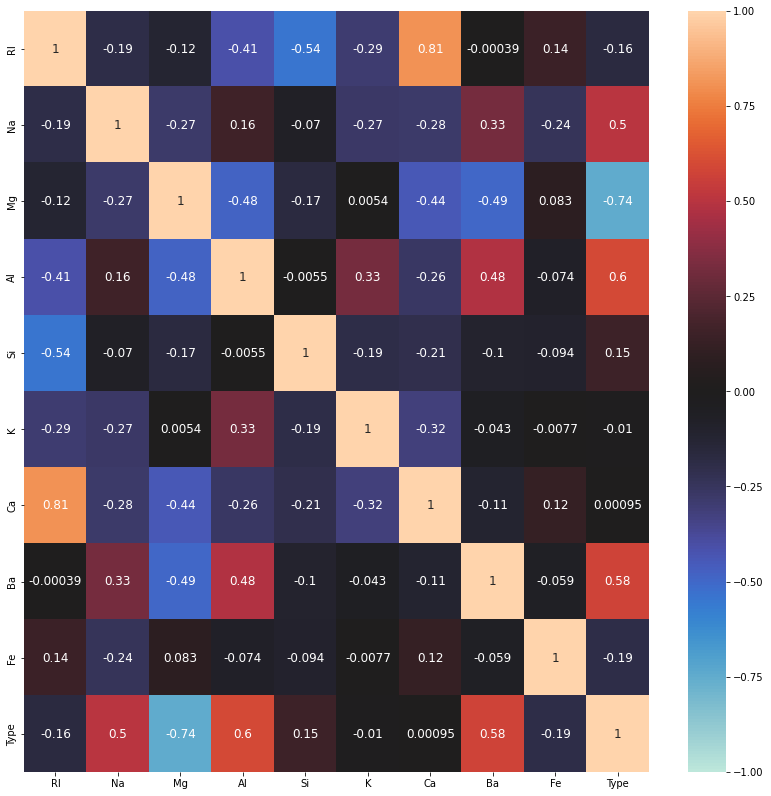

In [325]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 12}, vmin=-1, vmax=1, center=0)

### Очищаем датасет от выбросов 

In [326]:
def outliers(df):
  
  outlier_idx = []

  for col in df.columns.tolist():
    # считаем нижнюю и верхнюю границу через 1 и 3 квартили 
    q25 = df[col].quantile(q=.25)
    q75 = df[col].quantile(q=.75)
    iqr = q75-q25

    max_border = q75 + (1.5*iqr)
    min_border = q25 - (1.5*iqr)
        
    # определем индекс строки, содержащей выбросы
    outlier_list_col = df[(df[col] < min_border) | (df[col] > max_border)].index
    
    # заполняем найденными индеками массив со всеми индексами
    outlier_idx.extend(outlier_list_col)
    
  # выбираем индексы строк, содержащих больше чем два выброса
  outlier_idx = Counter(outlier_idx)        
  multiple_outliers = list( k for k, v in outlier_idx.items() if v > 2 )
  
  return multiple_outliers   

print(f'Этот датасет содержит {len(outliers(df[df.columns[:-1].tolist()]))} точек данных с более чем 2 выбросами')   

Этот датасет содержит 14 точек данных с более чем 2 выбросами


Очищаем лишние строки, 

In [327]:
df = df.drop(outliers(df[df.columns[:-1].tolist()])).reset_index(drop=True)
df.shape

(200, 10)

### Выделяем целевую переменную и остальные признаки

In [328]:
y = df['Type']
x = df.drop(['Type'], axis=1)

### Разделяем выбору в соотношении 80/20 процентов, `shuffle=False` для исключения перемешивания данных

In [329]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=True)

In [330]:
print(f'Количество точек исходных данных: {y.shape[0]}')
print(f'Количество точек тренировочных данных: {y_train.shape[0]}')
print(f'Количество точек тестовых данных: {y_test.shape[0]}')

Количество точек исходных данных: 200
Количество точек тренировочных данных: 140
Количество точек тестовых данных: 60


### Нормализуем наши данные 

Я использую для этого МинМаксСкалер, можно еще использовать СтандартСкалер

In [331]:
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

### Задача классификации

Так как этих методов дохуя, сделаем классификацию с использованием основных пяти: 
- логистическая регрессия 
- метод опорных векторов (линейное ядрос)
- метод опорных векторов (гауссовое ядро)
- метод k ближайших соседей 
- метод деревая решений 

#### Логистическая регрессия

In [332]:
from sklearn.linear_model import LogisticRegression

In [333]:
cls = LogisticRegression(solver='lbfgs', max_iter=1000).fit(x_train, y_train)
y_pred_cls = cls.predict(x_test)

matrix_cls = metrics.confusion_matrix(y_test, y_pred_cls)
print(matrix_cls)

[[ 8 16  0  0  0]
 [ 3 14  1  0  0]
 [ 1  1  0  0  1]
 [ 2  2  0  0  0]
 [ 0  1  0  0 10]]


In [334]:
print(f'Метрика достоверности (logistic): {metrics.accuracy_score(y_test, y_pred_cls)}')
print(f'Метрика точности (logistic): {metrics.precision_score(y_test, y_pred_cls, average = "micro")}')
print(f'Метрика полноты (logistic): {metrics.recall_score(y_test, y_pred_cls, average = "micro")}')

Метрика достоверности (logistic): 0.5333333333333333
Метрика точности (logistic): 0.5333333333333333
Метрика полноты (logistic): 0.5333333333333333


#### Метод опорных векторов с линейным ядром 

In [335]:
from sklearn import svm

In [336]:
svc = svm.SVC(kernel='linear', probability=True).fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)
print(matrix_svc)

[[ 5 19  0  0  0]
 [ 1 16  1  0  0]
 [ 0  1  2  0  0]
 [ 1  3  0  0  0]
 [ 0  1  0  0 10]]


In [337]:
print(f'Метрика достоверности (svc linear): {metrics.accuracy_score(y_test, y_pred_svc)}')
print(f'Метрика точности (svc linear): {metrics.precision_score(y_test, y_pred_svc, average = "micro")}')
print(f'Метрика полноты (svc linear): {metrics.recall_score(y_test, y_pred_svc, average = "micro")}')

Метрика достоверности (svc linear): 0.55
Метрика точности (svc linear): 0.55
Метрика полноты (svc linear): 0.55


#### Метод опорных векторов с гауссовым ядром 

In [338]:
svc_g = svm.SVC(kernel='rbf', probability=True).fit(x_train, y_train)
y_pred_svc_g = svc_g.predict(x_test)

matrix_svc_g = metrics.confusion_matrix(y_test, y_pred_svc_g)
print(matrix_svc_g)

[[ 6 18  0  0  0]
 [ 2 16  0  0  0]
 [ 0  1  2  0  0]
 [ 1  2  0  1  0]
 [ 0  1  0  0 10]]


In [339]:
print(f'Метрика достоверности (svc rbf): {metrics.accuracy_score(y_test, y_pred_svc_g)}')
print(f'Метрика точности (svc rbf): {metrics.precision_score(y_test, y_pred_svc_g, average = "micro")}')
print(f'Метрика полноты (svc rbf): {metrics.recall_score(y_test, y_pred_svc_g, average = "micro")}')

Метрика достоверности (svc rbf): 0.5833333333333334
Метрика точности (svc rbf): 0.5833333333333334
Метрика полноты (svc rbf): 0.5833333333333334


#### Метод k ближайших соседей

In [340]:
from sklearn.neighbors import KNeighborsClassifier

In [341]:
# количество соседей n_neighbors = 10 подбирала вручную, проверку делала на метрике точности
kn = KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)
y_pred_kn = kn.predict(x_test)

matrix_kn = metrics.confusion_matrix(y_test, y_pred_kn)
print(matrix_kn)

[[18  6  0  0  0]
 [ 9  7  1  1  0]
 [ 1  0  2  0  0]
 [ 1  1  1  0  1]
 [ 1  0  0  0 10]]


In [342]:
print(f'Метрика достоверности (KN): {metrics.accuracy_score(y_test, y_pred_kn)}')
print(f'Метрика точности (KN): {metrics.precision_score(y_test, y_pred_kn, average = "micro")}')
print(f'Метрика полноты (KN): {metrics.recall_score(y_test, y_pred_kn, average = "micro")}')

Метрика достоверности (KN): 0.6166666666666667
Метрика точности (KN): 0.6166666666666667
Метрика полноты (KN): 0.6166666666666667


### Метод дерева решений 

In [343]:
from sklearn.tree import DecisionTreeClassifier

In [344]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
print(matrix_dt)

[[13  8  1  0  0  2]
 [ 9  7  0  1  0  1]
 [ 0  0  0  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  2  0  0  2  0]
 [ 1  5  0  0  0  5]]


In [345]:
print(f'Метрика достоверности (dec tree): {metrics.accuracy_score(y_test, y_pred_dt)}') 
print(f'Метрика точности (dec tree): {metrics.precision_score(y_test, y_pred_dt, average = "micro")}')
print(f'Метрика полноты (dec tree): {metrics.recall_score(y_test, y_pred_dt, average = "micro")}')

Метрика достоверности (dec tree): 0.4666666666666667
Метрика точности (dec tree): 0.4666666666666667
Метрика полноты (dec tree): 0.4666666666666667


### Оценка эффективности обучения моделей (метрики)

In [346]:
clas = {'LogisticRegression': y_pred_cls, 'SVC linear': y_pred_svc, 
        'SVC rbf': y_pred_svc_g, 'KNeighbors': y_pred_kn, 'DecisionTree': y_pred_dt}

for n, y_pred in clas.items():
  print(f'Достоверность ({n}): {metrics.accuracy_score(y_test, y_pred)}')
  print(f'Точность ({n}): {metrics.precision_score(y_test, y_pred, average = "micro")}')
  print(f'Полнота ({n}): {metrics.recall_score(y_test, y_pred, average = "micro")}\n')

Достоверность (LogisticRegression): 0.5333333333333333
Точность (LogisticRegression): 0.5333333333333333
Полнота (LogisticRegression): 0.5333333333333333

Достоверность (SVC linear): 0.55
Точность (SVC linear): 0.55
Полнота (SVC linear): 0.55

Достоверность (SVC rbf): 0.5833333333333334
Точность (SVC rbf): 0.5833333333333334
Полнота (SVC rbf): 0.5833333333333334

Достоверность (KNeighbors): 0.6166666666666667
Точность (KNeighbors): 0.6166666666666667
Полнота (KNeighbors): 0.6166666666666667

Достоверность (DecisionTree): 0.4666666666666667
Точность (DecisionTree): 0.4666666666666667
Полнота (DecisionTree): 0.4666666666666667



**На основе метрик мы видим, что все модели работают как хуйня ебаная, но самый норм — метод k ближайших соседей** 

### Вывод о недообученности/переобученности модели

In [347]:
acc_cls = metrics.accuracy_score(y_test, y_pred_cls)
acc_svc = metrics.accuracy_score(y_test, y_pred_svc)
acc_svc_g = metrics.accuracy_score(y_test, y_pred_svc_g)
acc_kn = metrics.accuracy_score(y_test, y_pred_kn)
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)

acc_train_cls = metrics.accuracy_score(y_train, cls.predict(x_train))
acc_train_svc = metrics.accuracy_score(y_train, svc.predict(x_train))
acc_train_svc_g = metrics.accuracy_score(y_train, svc_g.predict(x_train))
acc_train_kn = metrics.accuracy_score(y_train, kn.predict(x_train))
acc_train_dt = metrics.accuracy_score(y_train, dt.predict(x_train))

In [348]:
trained = pd.DataFrame(columns = ['test data', 'train data'])

logistic = [acc_cls, acc_train_cls]
svm = [acc_svc, acc_train_svc]
svm_g = [acc_svc, acc_train_svc]
kneighbors = [acc_kn, acc_train_kn]
dtree = [acc_dt, acc_train_dt]

trained.loc[0] = logistic
trained.loc[1] = svm
trained.loc[2] = svm_g
trained.loc[3] = kneighbors
trained.loc[4] = dtree

trained['result'] = trained.apply(lambda x: 'обучена адекватно' if (abs(x['test data'] - x['train data']) <= 0.015) else 
                                  ('недообучена' if (x['test data'] > x['train data']) else 'переобучена'), axis=1)
trained.set_axis(['LogisticRegression', 'SVC linear', 'SVC rbf', 'KNeighbors', 'DecisionTree'], axis='index', inplace=True)

trained

,test data,train data,result
LogisticRegression,0.533333,0.600000,переобучена
SVC linear,0.550000,0.592857,переобучена
SVC rbf,0.550000,0.592857,переобучена
KNeighbors,0.616667,0.671429,переобучена
DecisionTree,0.466667,1.000000,переобучена
